# Hello

The {py:func}`swmmio.Model()` class provides a high level API for interfacing with SWMM models. With this object, we can access model data from related sections of the inp file, and, if results are available, from the rpt file. Let's start with one of the example models included with swmmio: 

<Axes: >

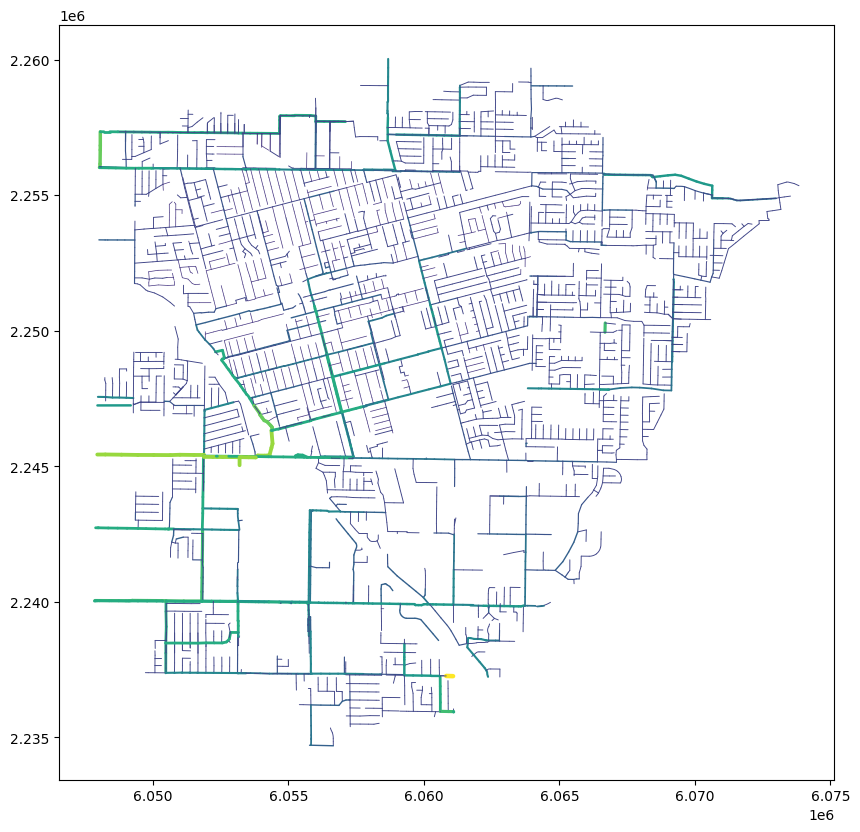

In [3]:
import swmmio

# instantiate a swmmio model object
from swmmio.examples import jersey
from swmmio.utils.spatial import centroid_and_bbox_from_coords
from swmmio.utils.functions import rotate_model
mymodel = swmmio.Model(jersey.inp.path)


# dataframe with useful data related to model nodes, conduits, and subcatchments
nodes = mymodel.nodes.dataframe
links = mymodel.links.dataframe
subs = mymodel.subcatchments.dataframe

# enjoy all the Pandas functions
links

(xc, yc), [x1, y1, x2, y2] = centroid_and_bbox_from_coords(jersey.inp.coordinates)

url = 'https://raw.githubusercontent.com/SWMMEnablement/NCIMM-Black-White-Box/25a7dc8fc58f67d15954679f294d09b9061766a4/SWMM5_NCIMM/10070_H_Elements.inp'

m = swmmio.Model(url)

m.links.geodataframe.plot('Geom1', linewidth=m.links.dataframe['Geom1'], capstyle='round', figsize=(10,10))
# jersey.nodes.geodataframe.plot('MaxDepth', ax=ax, markersize='InvertElev', zorder=2)

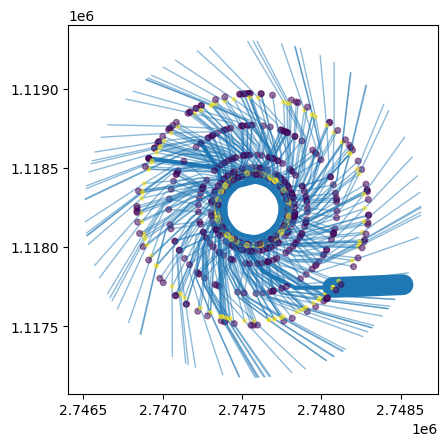

In [4]:
ax = jersey.links.geodataframe.plot(linewidth=jersey.links.dataframe['Geom1']*3, capstyle='round')
jersey.nodes.geodataframe.plot('MaxDepth', ax=ax, markersize='InvertElev', zorder=2)

import numpy as np

for rads in np.arange(0, 3*3.14, 0.1):
    jersey = rotate_model(jersey,rads=rads, origin=(xc, yc))
    jersey.links.geodataframe.plot(linewidth=1, capstyle='round', ax=ax, alpha=0.5)
    jersey.nodes.geodataframe.plot('MaxDepth', ax=ax, markersize='InvertElev', zorder=2, alpha=0.5)

In [ ]:
from swmmio.run_models.run import run_simple

run_simple(mymodel.inp.path )

mymodel2 = swmmio.Model(jersey.inp.path)
mymodel2.links.dataframe

running /Users/aerispa/projectcode/swmmio/swmmio/tests/data/model_full_features_network_xy.inp

... SWMM Version 5.2.4
 o  Retrieving project data
 o  Simulating day: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2    

,InletNode,OutletNode,Length,Roughness,InOffset,OutOffset,InitFlow,MaxFlow,WeirType,CrestHeight,...,Geom4,Barrels,Type,MaxQ,MaxDay,MaxHr,MaxV,MaxQPerc,MaxDPerc,coords
Name,,,,,,,,,,,,,,,,,,,,,
C1:C2,J1,J2,244.63,0.01,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,CONDUIT,2.49,0,10:26,6.33,1.34,0.50,"[(2747402.678, 1118092.704), (2747446.992, 1118044.9), (2747514.212, 1118016.207)]"
C2.1,J2,J3,666.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,CONDUIT,0.00,0,00:00,0.00,0.00,0.50,"[(2747514.212, 1118016.207), (2747634.497, 1117846.256), (2747834.998, 1117744.149), (2748073.306, 1117746.087)]"
1:4,1,4,400.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,CONDUIT,2.56,0,10:00,3.53,1.10,0.88,"[(2746913.127, 1118559.809), (2747345.325, 1118499.807)]"
4:5,4,5,400.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,CONDUIT,2.32,0,10:02,3.07,1.00,0.92,"[(2747345.325, 1118499.807), (2747386.555, 1118362.817)]"
5:J1,5,J1,400.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,CONDUIT,2.20,0,09:56,3.08,0.75,1.00,"[(2747386.555, 1118362.817), (2747402.678, 1118092.704)]"
3:4,3,4,400.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,CONDUIT,0.15,0,10:06,0.39,0.09,0.60,"[(2747242.131, 1118656.381), (2747345.325, 1118499.807)]"
2:5,2,5,400.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,CONDUIT,1.18,0,10:00,2.46,0.36,0.71,"[(2747728.148, 1118449.164), (2747386.555, 1118362.817)]"
C3,J3,J4,NaN,NaN,NaN,NaN,NaN,NaN,TRANSVERSE,0.0,...,0.0,NaN,WEIR,6.04,0,10:00,0.30,NaN,NaN,"[(2748073.306, 1117746.087), (2748515.571, 1117763.466)]"
C2,J2,J3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PUMP,3.49,0,10:26,0.17,NaN,NaN,"[(2747514.212, 1118016.207), (2748073.306, 1117746.087)]"


In [12]:

# calculate average and weighted average impervious
avg_imperviousness = subs.PercImperv.mean()
weighted_avg_imp = (subs.Area * subs.PercImperv).sum() / len(subs)
# weighted_avg_imp

avg_imperviousness

np.float64(63.75)

In [1]:
from swmmio.examples import jersey
from swmmio import Model, Nodes
import pandas as pd 

pd.options.display.max_columns = 20

jersey.inp.storage


,InvertElev,MaxD,InitDepth,StorageCurve,Coefficient,Exponent,Constant,PondedArea,EvapFrac
Name,,,,,,,,,
J1,13.392,15,0,FUNCTIONAL,1000,0,0,0,0


In [10]:
# download file from github repo
import requests
import tempfile
import swmmio
from urllib.parse import urlparse
url = 'https://raw.githubusercontent.com/SWMMEnablement/NCIMM-Black-White-Box/25a7dc8fc58f67d15954679f294d09b9061766a4/SWMM5_NCIMM/10070_H_Elements.inp'

# r = requests.get(url)
# temp_path = f'{tempfile.gettempdir()}/Example2.inp'
# with open(temp_path, 'wb') as f:
#     f.write(r.content)


def check_if_url_and_download(url):

    if url.startswith('http'):
        r = requests.get(url)

        # get the filename from the url
        parsed_url = urlparse(url)
        filename = parsed_url.path.split('/')[-1]

        temp_path = f'{tempfile.gettempdir()}/{filename}'
        with open(temp_path, 'wb') as f:
            f.write(r.content)
        return temp_path
    else:
        return url

# create a model object
temp_path = check_if_url_and_download(url)
m = swmmio.Model(temp_path)
m.inp.conduits

# ax = m.links.geodataframe.plot('Geom1', linewidth=m.links.dataframe['Geom1'], capstyle='round', figsize=(10,10))
# m.nodes.geodataframe.plot('InvertElev', ax=ax, markersize=0.5, zorder=2)


,InletNode,OutletNode,...,InitFlow,MaxFlow
Name,,,,,
AC067408-AC067409,AC067408,AC067409,...,0.0,0.0
AC067409-AC067414,AC067409,AC067414,...,0.0,0.0
AC067410-AC067415,AC067410,AC067415,...,0.0,0.0
AC067411-AC067417,AC067411,AC067417,...,0.0,0.0
AC067412-AC067418,AC067412,AC067418,...,0.0,0.0
...,...,...,...,...,...
WKFIELD5-WKFIELD6,WAKEFIELD5,WAKEFIELD6,...,0.0,0.0
WKFIELD6-WKFIELD7,WAKEFIELD6,WAKEFIELD7,...,0.0,0.0
WKFIELD7-WKFIELD8,WAKEFIELD7,WAKEFIELD8,...,0.0,0.0


In [ ]:

url = 'https://raw.githubusercontent.com/SWMMEnablement/NCIMM-Black-White-Box/25a7dc8fc58f67d15954679f294d09b9061766a4/SWMM5_NCIMM/10070_H_Elements.inp'
parsed_url = urlparse(url)
parsed_url.path.split('/')[-1]
# get last element of the url

# url.split('/')[-1]

'10070_H_Elements.inp'

ParseResult(scheme='', netloc='', path='deoihroefh', params='', query='', fragment='')

<Axes: >

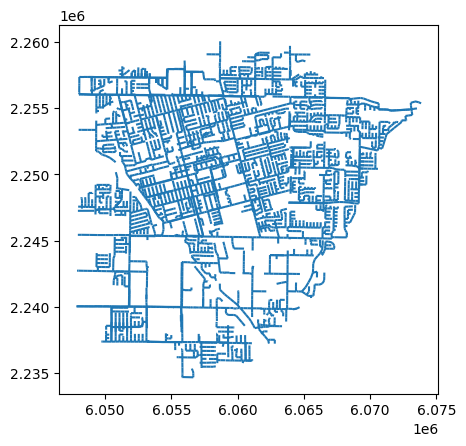

In [17]:
m.links.geodataframe.plot()

/Users/aerispa/projectcode/swmmio/swmmio/elements.py:92: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, axis=0, sort=False)


<Axes: >

In [3]:
from swmmio.tests.data import MODEL_FULL_FEATURES__NET_PATH

model = Model(MODEL_FULL_FEATURES__NET_PATH) 

nodes1 = Nodes(
    model=model, 
    inp_sections=['junctions', 'storages', 'outfalls'],
    rpt_sections=['Node Depth Summary', 'Node Inflow Summary'],
    # columns=[ 'InvertElev', 'MaxDepth', 'InitDepth', 'SurchargeDepth', 'MaxTotalInflow', 'coords']
)

nodes = Nodes(
    model=model, 
    inp_sections=['junctions', 'storage', 'outfalls'],
    rpt_sections=['Node Depth Summary', 'Node Inflow Summary'],
)
nodes.dataframe

,InvertElev,MaxDepth,InitDepth,SurchargeDepth,PondedArea,MaxD,StorageCurve,Coefficient,Exponent,Constant,...,MaxTotalInflow,MaxDay,MaxHr,LatInflowV,TotalInflowV,FlowBalErrorPerc,XXX,X,Y,coords
Name,,,,,,,,,,,,,,,,,,,,,
J3,6.547,15.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,7.04,0,09:59,2.017,6.096,NaN,NaN,459.058,-113.145,"[(459.058, -113.145)]"
1,17.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.61,0,09:59,0.131,0.131,NaN,NaN,-77.021,-78.321,"[(-77.021, -78.321)]"
2,17.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.00,0,00:00,0.000,0.000,NaN,NaN,-84.988,43.833,"[(-84.988, 43.833)]"
3,16.500,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.13,0,09:54,0.000,0.001,NaN,NaN,-18.600,-71.239,"[(-18.6, -71.239)]"
4,16.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.54,0,10:00,0.000,0.131,NaN,NaN,-67.284,-37.603,"[(-67.284, -37.603)]"
5,15.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.38,0,10:03,0.000,0.131,NaN,NaN,-56.662,15.507,"[(-56.662, 15.507)]"
J2,13.000,15.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,4.33,0,09:59,1.991,4.078,NaN,NaN,238.750,-53.332,"[(238.75, -53.332)]"
J1,13.392,NaN,0.0,NaN,0.0,15.0,FUNCTIONAL,1000.0,0.0,0.0,...,3.52,0,09:59,1.962,2.093,NaN,NaN,0.000,0.000,"[(0.0, 0.0)]"
J4,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.00,0,10:00,0.000,6.094,NaN,NaN,671.391,-163.985,"[(671.391, -163.985)]"


In [4]:
nodes.dataframe

,InvertElev,MaxDepth,InitDepth,SurchargeDepth,PondedArea,MaxD,StorageCurve,Coefficient,Exponent,Constant,...,MaxTotalInflow,MaxDay,MaxHr,LatInflowV,TotalInflowV,FlowBalErrorPerc,XXX,X,Y,coords
Name,,,,,,,,,,,,,,,,,,,,,
J3,6.547,15.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,7.04,0,09:59,2.017,6.096,NaN,NaN,459.058,-113.145,"[(459.058, -113.145)]"
1,17.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.61,0,09:59,0.131,0.131,NaN,NaN,-77.021,-78.321,"[(-77.021, -78.321)]"
2,17.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.00,0,00:00,0.000,0.000,NaN,NaN,-84.988,43.833,"[(-84.988, 43.833)]"
3,16.500,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.13,0,09:54,0.000,0.001,NaN,NaN,-18.600,-71.239,"[(-18.6, -71.239)]"
4,16.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.54,0,10:00,0.000,0.131,NaN,NaN,-67.284,-37.603,"[(-67.284, -37.603)]"
5,15.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.38,0,10:03,0.000,0.131,NaN,NaN,-56.662,15.507,"[(-56.662, 15.507)]"
J2,13.000,15.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,4.33,0,09:59,1.991,4.078,NaN,NaN,238.750,-53.332,"[(238.75, -53.332)]"
J1,13.392,NaN,0.0,NaN,0.0,15.0,FUNCTIONAL,1000.0,0.0,0.0,...,3.52,0,09:59,1.962,2.093,NaN,NaN,0.000,0.000,"[(0.0, 0.0)]"
J4,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.00,0,10:00,0.000,6.094,NaN,NaN,671.391,-163.985,"[(671.391, -163.985)]"


In [5]:
print(nodes2.dataframe.to_string())

NameError: name 'nodes2' is not defined

In [ ]:
model.inp.storage

,InvertElev,MaxD,InitDepth,StorageCurve,Coefficient,Exponent,Constant,PondedArea,EvapFrac
Name,,,,,,,,,
J1,13.392,15,0,FUNCTIONAL,1000,0,0,0,0
